In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd 
import matplotlib.style as stl
stl.use('dark_background')

In [2]:
ff1.Cache.enable_cache('/Users/javi/Library/Caches')

In [3]:
quali = ff1.get_session(2022, "Jeddah", "Q")
quali.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '1', '31', '63', '14', '77', '10', '20', '4', '3', '24', '47', '18', '44', '23', '27', '6', '22']


In [4]:
laps_charles = quali.laps.pick_driver('LEC')
laps_checo = quali.laps.pick_driver('PER')
fastest_charles = laps_charles.pick_fastest()
fastest_checo = laps_checo.pick_fastest()
telemetry_charles = fastest_charles.get_telemetry().add_distance()
telemetry_checo = fastest_checo.get_telemetry().add_distance()
ferrari = fastest_charles['Team']
rb = fastest_checo['Team']

In [5]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_charles, fastest_checo)

In [6]:
plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {'LEC'} VS {'PER'}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

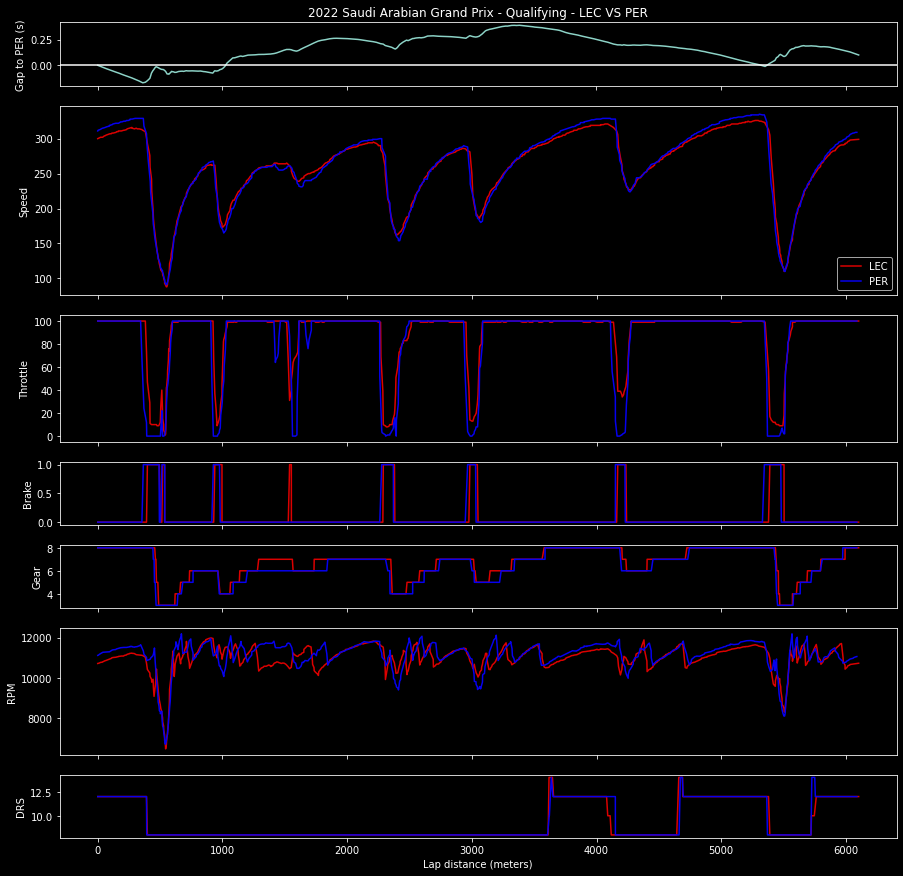

In [7]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {'PER'} (s)")

# Speed trace
ax[1].plot(telemetry_charles['Distance'], telemetry_charles['Speed'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[1].plot(telemetry_checo['Distance'], telemetry_checo['Speed'], label='PER', color=ff1.plotting.team_color(rb))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_charles['Distance'], telemetry_charles['Throttle'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[2].plot(telemetry_checo['Distance'], telemetry_checo['Throttle'], label='PER', color=ff1.plotting.team_color(rb))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_charles['Distance'], telemetry_charles['Brake'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[3].plot(telemetry_checo['Distance'], telemetry_checo['Brake'], label='PER', color=ff1.plotting.team_color(rb))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_charles['Distance'], telemetry_charles['nGear'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[4].plot(telemetry_checo['Distance'], telemetry_checo['nGear'], label='PER', color=ff1.plotting.team_color(rb))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_charles['Distance'], telemetry_charles['RPM'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[5].plot(telemetry_checo['Distance'], telemetry_checo['RPM'], label='PER', color=ff1.plotting.team_color(rb))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_charles['Distance'], telemetry_charles['DRS'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[6].plot(telemetry_checo['Distance'], telemetry_checo['DRS'], label='PER', color=ff1.plotting.team_color(rb))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()